# the goal is to create an adj matrix for the whole period between the top organization

In [8]:
import pandas as pd
import numpy as np
import glob
import json

# import data


In [9]:
df_email=pd.read_csv('top_organization_email.csv')


In [10]:
pd.set_option('display.max_columns', None)
df_email.head(4)

,filenm,From,Sent,To,CC,Bcc,Subject,Attachments,Importance,isThread,isAutoMessage,isDisplacement,hasAllCapLine,hasBadDate,Body,timestamp,date_sent,time_sent,cc,nb_words,nb_chars,body_len,body,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,email_count
0,07309_fn_34-3-ScottMaddox3_ln_27643.txt,info@flcities.com,"Thursday, June 6, 2013 10:20 AM",scott.maddox@talgov.com,invalid_nan,NaN,In Case You Missed It: State of the Cities Re...,NaN,NaN,False,False,True,False,False,"['Having trouble viewing this email?', 'Click ...",1.370510e+09,2013-06-06,09:20,INVALID_TYPE,539,6243,6781,Having trouble viewing this email? Click here ...,519.750000,352.354685,5903.214286,3860.043258,28
1,36410_fn_32-1-PaigeCS-1-2_ln_20727.txt,edward.kring@talgov.com,2/15/17 4:11 PM (GMT-05:00),mike.kissane@talgov.com;invalid,angela.baldwin@talgov.com,NaN,RE: Trolley test runs,NaN,NaN,False,False,False,False,False,['The consensus seems to be that we are hesita...,1.487175e+09,2017-02-15,16:07,Jay Rosser Jay.Johansen@talgov.com;Jay Harris...,78,396,473,The consensus seems to be that we are hesitant...,98.508197,210.751720,509.262295,993.019602,61
2,68317_fn_10-8-Cascade-2017_ln_116565.txt,ashley.edwards@talgov.com,"Wednesday, February 15, 2017 1:33 PM",ryan@edisontally.com,invalid_nan,NaN,Accepted: Updated Invitation: Summer Movie Ni...,NaN,NaN,False,True,True,False,False,"['2pm - 3pm (EST) (Ashley Edwards)', '21']",1.487166e+09,2017-02-15,13:33,INVALID_TYPE,7,29,35,2pm - 3pm (EST) (Ashley Edwards) 21,76.500000,58.669009,441.500000,360.704647,20
3,18389_fn_10-1-Cascade-2013_ln_9561.txt,roxanne.manning@talgov.com,"Friday, December 06, 2013 3:44 PM",rgrindler@101tally.com;charleshargraves;autumn...,markbeaudoin,NaN,RE: Meeting follow-up,NaN,NaN,False,False,False,False,False,"['Charles,', 'Agreed. As for the wooden covers...",1.386345e+09,2013-12-06,15:44,Mark Beaudoin,40,215,254,"Charles, Agreed. As for the wooden covers on t...",143.698113,324.517783,748.754717,1721.994259,53


In [11]:
with open('top_organization.json', 'r') as f:
    top_organization_dict = json.load(f)

# get the adj matrix

In [42]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [43]:
from_list = df_email['From'].values.tolist()
#for i in range(len(from_list)):
#    from_list[i] = eval(from_list[i])
#df_email['From'] = from_list

to_list = df_email['To'].values.tolist()
#for i in range(len(to_list)):
#    to_list[i] = eval(to_list[i])
#df_email['To'] = to_list

cc_list = df_email['CC'].values.tolist()

unique_people = set()
for i in range(len(from_list)):
    unique_people.add(from_list[i])

for i in range(len(cc_list)):
    for lst in cc_list[i].split(';'):
        unique_people.add(lst)

for i in range(len(to_list)):
    for lst in to_list[i].split(';'):
        unique_people.add(lst) 

unique_people = list(unique_people)
unique_people.sort()
name2id, id2name = nameToIndexDict(unique_people)










In [44]:
top_org_list = []
for v in top_organization_dict.values():
    top_org_list += v

nodes_to_add = list(top_organization_dict.keys()) 

top_org_idx_list = []
for i,people in enumerate(unique_people): #get the index in the unique people
    if people in top_org_list:
        top_org_idx_list.append(i)

  

In [45]:
num_people = len(unique_people)


In [46]:
num_people = len(unique_people)

idx_mapping = {}
top_org_idx_list_new = []
for person,idx_list in top_organization_dict.items():
    global_indices = []
    for idx in idx_list: #get the specific email in the email list of the dictionary's value.
        if idx not in unique_people:
            continue
        global_idx = unique_people.index(idx) #unique people is all the people involved in the top org email csv
        global_indices.append(global_idx)
        
    idx_mapping[person] = global_indices #domain and the related index in the unique people list.
    num_people +=1
    #cra_idx_list_new.append(num_people) 





In [47]:
idx_mapping['Florida State U'][1:5]

[1575, 373, 1893, 469]

In [48]:
col_names = []
for idx,name in enumerate(idx_mapping):    # unique_names
    #print(name, idx_mapping[name])
    col_names.append(name)
col_names

['101 Restaurant',
 'Ausley McMullen',
 'Blueprint Intergovernmental Agency',
 'Broward County',
 'Capital City Bank',
 'Capital Health Plan',
 'City of Tallahassee',
 'Florida A&M U',
 'Florida Department of Children and Family',
 'Florida Department of Health',
 'Florida Department of State',
 'Florida Department of Transportation',
 'Florida House of Representatives',
 'Florida League of Cities',
 'Florida State U',
 'Gadsden County',
 'Greater Tallahassee Chamber of Commerce',
 'HCA Healthcare',
 'Hancock Whitney Bank',
 'Hunter and Harp Wealth Management LLC',
 'NAI TALCOR',
 'Prime Meridian Bank',
 'Tallahassee Community College',
 'Tallahassee Democrat',
 'Tallahassee Memorial HealthCare',
 'The Edison Resteraunt',
 'The Zimmerman Agency',
 'U of Florida',
 'United Way of the Big Bend',
 'WCTV',
 'leon County',
 'leon County Schools']

In [49]:
for idx,name in enumerate(idx_mapping):
    print(idx, name)
    

0 101 Restaurant
1 Ausley McMullen
2 Blueprint Intergovernmental Agency
3 Broward County
4 Capital City Bank
5 Capital Health Plan
6 City of Tallahassee
7 Florida A&M U
8 Florida Department of Children and Family
9 Florida Department of Health
10 Florida Department of State
11 Florida Department of Transportation
12 Florida House of Representatives
13 Florida League of Cities
14 Florida State U
15 Gadsden County
16 Greater Tallahassee Chamber of Commerce
17 HCA Healthcare
18 Hancock Whitney Bank
19 Hunter and Harp Wealth Management LLC
20 NAI TALCOR
21 Prime Meridian Bank
22 Tallahassee Community College
23 Tallahassee Democrat
24 Tallahassee Memorial HealthCare
25 The Edison Resteraunt
26 The Zimmerman Agency
27 U of Florida
28 United Way of the Big Bend
29 WCTV
30 leon County
31 leon County Schools


In [20]:

### plot from to 

# build adj_mat
adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
        continue

    rs = to_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '':
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                continue
            #print(s_idx,r_idx)
            adj_mat_from_to[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_to_directed = np.copy(adj_mat_from_to)

#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
#adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

### plot from cc 

# build adj_mat
adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

for i in range(len(from_list)):
    #s = name2id[from_list[i]] # id of the sender

    s_global_idx = unique_people.index(from_list[i]) # id of the sender

    # found index of this person in id_mapping 
    s_idx = -1
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
            s_idx = idx
    if s_idx == -1:
          #print("Error: didn't find index for s_global_idx ",s_global_idx)
        continue

    rs = cc_list[i].split(';')
    for j in range(len(rs)):
        if rs[j] != '' :
            #r = name2id[rs[j]]  # id of the receiver
            r_global_idx = unique_people.index(rs[j])  # id of the receiver

            # found index of this person in id_mapping 
            r_idx = -1
            for idx,name in enumerate(idx_mapping):    # unique_names
                #print(name, idx_mapping[name])
                if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                    r_idx = idx
            if r_idx == -1:
                  #print("Error: didn't find index for r_global_idx ",r_global_idx)
                continue
            #print(s_idx,r_idx)
            adj_mat_from_cc[s_idx,r_idx] += 1
#             adj_mat[s,r] += 1/num_TO_CC[i]

adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
#adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
#adj_mat_from_to = np.triu(adj_mat_from_to, 1)
adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    


In [46]:
#adj_mat_from_to_and_cc_directed_pd.to_csv('top org whole stage adj matrix.csv')

# based on adj matrix，draw email network figure

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

import copy
plt.rcParams["font.weight"] = "normal"


In [22]:
org_name=adj_mat_from_to_and_cc_directed_pd.columns.tolist()

In [23]:
org_gov=['Broward County','City of Tallahassee',
         'Florida Department of Children and Family',
 'Florida Department of Health',
 'Florida Department of State',
 'Florida Department of Transportation','Florida House of Representatives',
 'Florida League of Cities','Gadsden County','leon County']

In [24]:
org_non_gov=[]

for i in org_name:
    if i not in org_gov:
        org_non_gov.append(i)
    

In [25]:
org_non_gov

['101 Restaurant',
 'Ausley McMullen',
 'Blueprint Intergovernmental Agency',
 'Capital City Bank',
 'Capital Health Plan',
 'Florida A&M U',
 'Florida State U',
 'Greater Tallahassee Chamber of Commerce',
 'HCA Healthcare',
 'Hancock Whitney Bank',
 'Hunter and Harp Wealth Management LLC',
 'NAI TALCOR',
 'Prime Meridian Bank',
 'Tallahassee Community College',
 'Tallahassee Democrat',
 'Tallahassee Memorial HealthCare',
 'The Edison Resteraunt',
 'The Zimmerman Agency',
 'U of Florida',
 'United Way of the Big Bend',
 'WCTV',
 'leon County Schools']

In [26]:
school=['leon County Schools','U of Florida','Tallahassee Community College','Florida A&M U',
 'Florida State U']

In [27]:
non_school_non_gov=[]
for i in org_non_gov:
    if i not in school:
        non_school_non_gov.append(i)


In [29]:
nodes_names = list(adj_mat_from_to_and_cc_directed_pd.columns)

directed_adj_np=adj_mat_from_to_and_cc_directed_pd.iloc[:,:].to_numpy().astype('float')
directed_adj_np

array([[ 62.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  7.,   0.,  17., ...,   0.,  28.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   6.,   0.],
       [  0.,   0.,   0., ...,   1.,  21.,   2.],
       [  0.,   0.,   0., ...,   0.,  68., 107.]])

In [30]:
def plot_network_directed(adj_mat,nodes_names, pic_name = 'test', savefig=False):
    #fig = plt.figure(figsize=(12,12))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)

    #group1 = ['bill_proctor','curtis_richardson']
    
    if adj_mat[adj_mat !=0].mean() >25 : # in case number is too high, make points smaller
        adj_mat = adj_mat / 10
        
    #if adj_mat[adj_mat !=0].mean() < 3 and adj_mat[adj_mat !=0].mean() >=1.8 : # in case number is too low, make points larger
     #   adj_mat = adj_mat * 2
    
    
    group1= school
    group1_list=[]
    for i,people in enumerate(nodes_names):
        if people in group1:
            group1_list.append(i)
    group1_list

    group2 = org_gov
    group2_list=[]
    for i,people in enumerate(nodes_names):
        if people in group2:
            group2_list.append(i)
    group2_list

    group3 = non_school_non_gov
    group3_list=[]
    for i,people in enumerate(nodes_names):
        if people in group3:
            group3_list.append(i)
    group3_list

    name2id = {}
    id2name = {}
    for i in range(len(nodes_names)):
        name2id[nodes_names[i]] = i
        id2name[i] = nodes_names[i]


    # new
    fig = plt.figure(figsize=(20,14))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)
    #fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')

    G = nx.DiGraph(directed=True) #change to directed network
    G.add_nodes_from(nodes_names)
    #prepare for plot
    networks = [1,2,3]

    networks_list = []
    for i in range(len(nodes_names)):
        if i in group1_list:
            networks_list.append(1)
        elif i in group2_list:
            networks_list.append(2) 
        else:
            networks_list.append(3)
    # map color
    node_network_map = dict(zip(nodes_names, networks_list))
    colors = ['red','orange' , 'green']
    color_map = dict(zip(networks, colors))

    print("nodes_names: ",len(nodes_names))
    print("adj_mat: ",adj_mat.shape)
    for row, row_val in enumerate(nodes_names):
        for col, col_val in enumerate(nodes_names):
            #if col < row and adj_mat[row, col] != 0.0:
            if adj_mat[row, col] != 0.0 and col != row:
                G.add_edge(row_val, col_val)

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}

    
    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    radii = [3,6,10]  # for concentric circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles
    #scale edge width
    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = edge_width*0.3
#scale node size
    node_size = adj_mat.sum(axis=0)+1
    node_size = 10*node_size
    labeling_idx = node_size.argsort()[::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        tmp = node#john_mark
        labels[node] = tmp

    node_sizes = {}
    node_sizes['red'] = node_size[group1_list]
    node_sizes['orange'] = node_size[group2_list]
    node_sizes['green'] = node_size[group3_list]
    #node_sizes['green'] = node_size[[item for item in np.arange(len(nodes_names)) if item not in (group1_list+group2_list)]]

    legend_labels = {'red': 'School','orange': 'Government Agency','green': 'Non-government Agency' }
    pos_new = copy.deepcopy(pos)
    for k, v in pos.items():
        print("k: ", k, " v: ",v)
        if k == 'City of Tallahassee':
            pos_new[k][0] = pos_new[k][0] 
            pos_new[k][1] = pos_new[k][1]-10
        elif k == 'Florida Department of Children and Family':
            pos_new[k][0] = pos_new[k][0] 
            pos_new[k][1] = pos_new[k][1]-13
        elif k == 'Florida Department of State':
            pos_new[k][0] = pos_new[k][0]+8
            pos_new[k][1] = pos_new[k][1]
        elif k == 'Tallahassee Memorial HealthCare':
            pos_new[k][0] = pos_new[k][0]+8
            pos_new[k][1] = pos_new[k][1]
        elif k == 'Greater Tallahassee Chamber of Commerce':
            pos_new[k][0] = pos_new[k][0]+1.3
            pos_new[k][1] = pos_new[k][1]
            
            
            
            
            
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos_new, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

        
    
#       if k == 'curtisrichardson':
#         pos_new[k][0] = pos_new[k][0] 
#         pos_new[k][1] = pos_new[k][1]
        
        
   
    nx.draw_networkx_edges(G, pos=pos_new, width=edge_width, edge_color = 'black')

    print("pos: ", len(pos), ' labels: ', len(labels))

   #pos_new = copy.deepcopy(pos)
    

#       if k=='billproctor':
#         pos_new[k][0] = pos_new[k][0] + 1.4



    nx.draw_networkx_labels(G, pos=pos_new, labels=labels, font_size=16, font_color='black')
    
    plt.legend(fontsize = 24, loc=0)
    plt.axis('off')

    #plt.subplots_adjust(left=0.4, bottom=0.1, right=0.9, top=0.2)
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=4, wspace=0, hspace=0)
    plt.title(pic_name,fontsize = 24, fontweight='bold')

    plt.tight_layout()
    if savefig == True:
        savefig_out = pic_name.replace(' ','_')
        plt.savefig(savefig_out+'.png')
    plt.show()

nodes_names:  32
adj_mat:  (32, 32)
k:  101 Restaurant  v:  [ 1.00000000e+01 -4.25295747e-08]
k:  Ausley McMullen  v:  [9.80785251 1.95090316]
k:  Blueprint Intergovernmental Agency  v:  [9.23879505 3.82683446]
k:  Broward County  v:  [4.98881759 3.33342139]
k:  Capital City Bank  v:  [7.07106774 7.07106754]
k:  Capital Health Plan  v:  [5.55570252 8.31469578]
k:  City of Tallahassee  v:  [2.29610079 5.54327691]
k:  Florida A&M U  v:  [0.5852711  2.94235569]
k:  Florida Department of Children and Family  v:  [-1.66901390e-07  5.99999988e+00]
k:  Florida Department of Health  v:  [-1.17054183  5.88471138]
k:  Florida Department of State  v:  [-2.29610025  5.54327727]
k:  Florida Department of Transportation  v:  [-3.33342096  4.98881783]
k:  Florida House of Representatives  v:  [-4.24264045  4.24264052]
k:  Florida League of Cities  v:  [-4.98881776  3.33342103]
k:  Florida State U  v:  [-2.77163842  1.14805043]
k:  Gadsden County  v:  [-5.88471167  1.17054181]
k:  Greater Tallahassee 

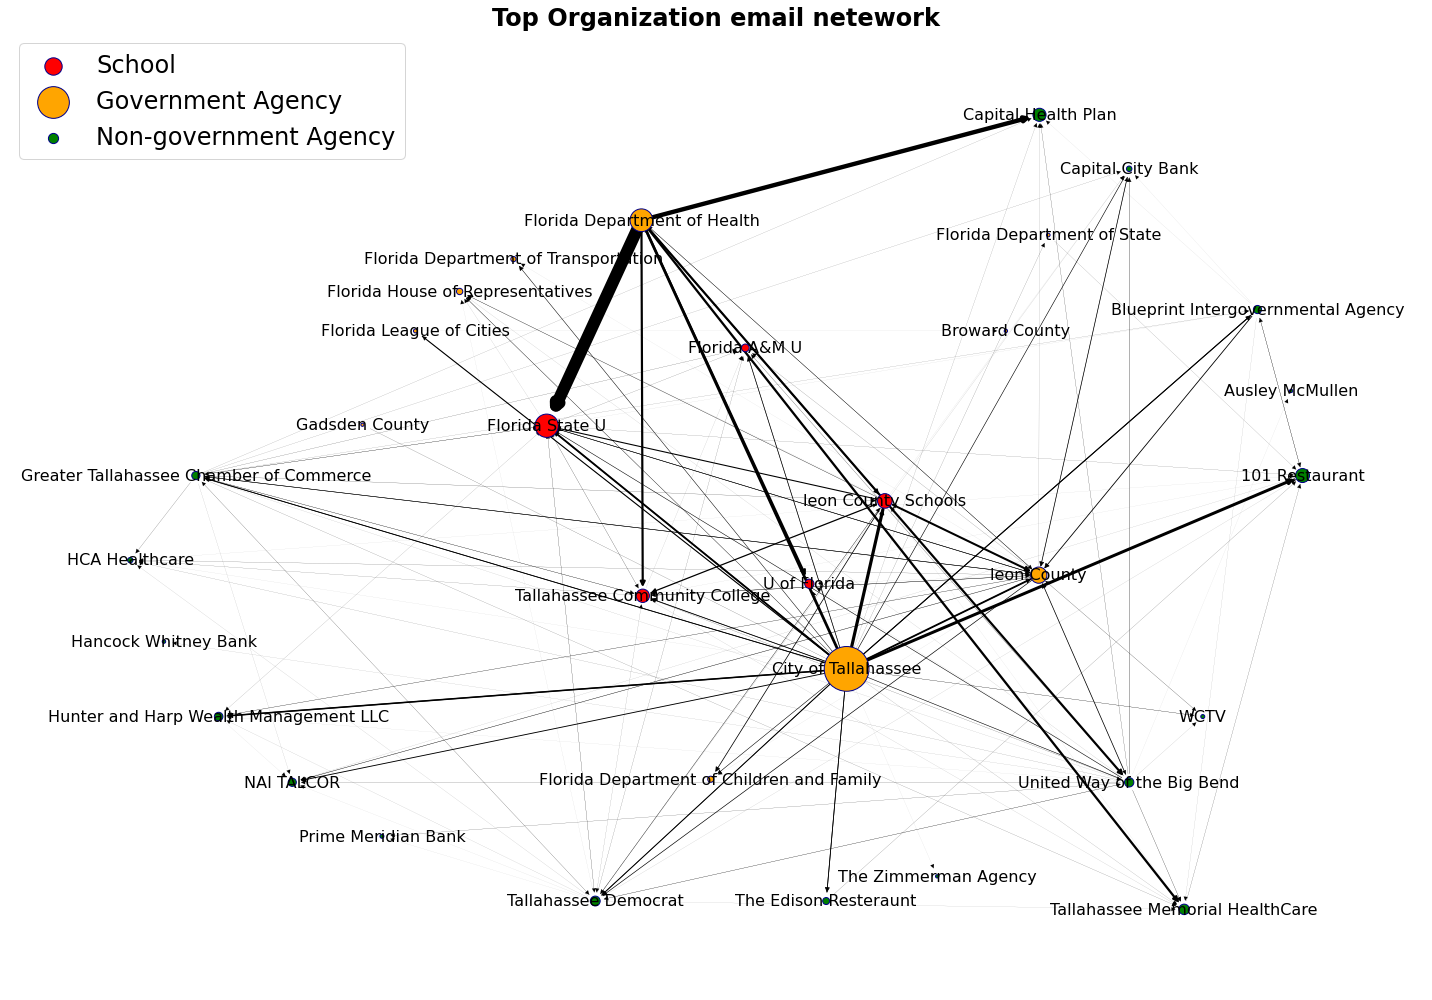

In [31]:
whole_stage=plot_network_directed(directed_adj_np,nodes_names, pic_name = 'Top Organization email netework', savefig=False)




#  calculate centrality by month

 betweenness and closeness centrality, the weight is the inverse of email number

In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
import csv
from numpy import genfromtxt
import glob

## get email by month

In [39]:
# groupby your key and freq
data_new = df_email.copy() 
data_new['date_sent']=pd.to_datetime(data_new.date_sent)           
data_new = data_new.sort_values(by = ['date_sent']) 

g = data_new.groupby(pd.Grouper(key='date_sent', freq='M'))
# groups to a list of dataframes with list comprehension

dfs = [group for _,group in g]
for i in range(len(dfs)):
    if len(dfs[i])!=0:
        name=str(dfs[i]['date_sent'].tolist()[0])[0:7] #get the first seven character,that is year_month #??名字怎么改？
        #dfs[i].to_csv(str(i)+'_'+name+'.csv',index=0)
  



## calculate adj matrix by month

In [41]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [50]:
#define a function to transform email into adj matrix

def process_data_both_new(infile):
    df_email = pd.read_csv(infile,index_col = 0)
    from_list = df_email['From'].values.tolist()
    #for i in range(len(from_list)):
    #    from_list[i] = eval(from_list[i])
    #df_email['From'] = from_list

    to_list = df_email['To'].values.tolist()
    #for i in range(len(to_list)):
    #    to_list[i] = eval(to_list[i])
    #df_email['To'] = to_list

    cc_list = df_email['CC'].values.tolist()

    unique_people = set()
    for i in range(len(from_list)):
        unique_people.add(from_list[i])

    for i in range(len(cc_list)):
        for lst in cc_list[i].split(';'):
            unique_people.add(lst)

    for i in range(len(to_list)):
        for lst in to_list[i].split(';'):
            unique_people.add(lst) 

    unique_people = list(unique_people)
    unique_people.sort()
    name2id, id2name = nameToIndexDict(unique_people)
    
    top_org_list = []
    for v in top_organization_dict.values():
        top_org_list += v

    nodes_to_add = list(top_organization_dict.keys()) 

    top_org_idx_list = []
    for i,people in enumerate(unique_people): #get the index in the unique people
        if people in top_org_list:
            top_org_idx_list.append(i)
            
    num_people = len(unique_people)

    idx_mapping = {}
    top_org_idx_list_new = []
    for person,idx_list in top_organization_dict.items():
        global_indices = []
        for idx in idx_list: #get the specific email in the email list of the dictionary's value.
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx) #unique people is all the people involved in the top org email csv
            global_indices.append(global_idx)

        idx_mapping[person] = global_indices #domain and the related index in the unique people list.
        num_people +=1

    col_names = []
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        col_names.append(name)
     
    ### plot from to 

    # build adj_mat
    adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = to_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '':
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_to[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_to_directed = np.copy(adj_mat_from_to)

    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
    adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
    adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

    ### plot from cc 

    # build adj_mat
    adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = cc_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '' :
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_cc[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
    #adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

    adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
    adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


    adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
    adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

    adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
    adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    return adj_mat_from_to_and_cc_directed_pd

    
    





In [55]:
#read email file by month and create adj matrix by month

path = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/email by month' # use your path
all_files = glob.glob(path + "/*.csv")
ind=0

for file in all_files:
    adj_mat_all=process_data_both_new(file)
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','').split('_')[-1]
    #print(filename)
    adj_mat_all.to_csv(str(ind)+'top_org_adjmatrix_'+filename+'.csv')
    ind=ind+1





## calculate centrality

In [56]:

adj_folder=r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/adj matrix'
all_files = glob.glob(adj_folder + "/*.csv")
outdir='/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/centrality_weighted'



In [62]:
import os
try:
    os.makedirs(outdir)
except FileExistsError:
    # directory already exists
    pass



In [63]:
ind=0

whole_network_mean_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

whole_network_std_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

for file in all_files:
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','').split('_')[-1]
    ind=ind+1
    
    #print(filename)
   


    data=pd.read_csv(file,index_col=0)
    name=data.columns.to_list()
    adj_s1 = data.to_numpy()
    #s1=genfromtxt(test_file,delimiter=',')
    #get matrix
    #adj_s1 = s1[1:,1:]
    #get networks
    gs1 = nx.from_numpy_matrix(adj_s1)
    gs1_dc = nx.degree_centrality(gs1)
    
    #gs1_bc=nx.betweenness_centrality((gs1))
    
    
    #get the inverse to calucate cc
    re1=np.reciprocal(adj_s1)
    re1[re1 == inf] = 0
   
    re_graph1=nx.from_numpy_matrix(re1)
    
    gs1_cc=nx.closeness_centrality((re_graph1))
    gs1_bc=nx.betweenness_centrality((re_graph1)) #weight all equal to the reverse of the email number
    time= tmp[-1].replace('.csv','').split('_')[-1]
    
    #gs1_den=nx.density(gs1)
    #calculate the clustering coefficient for the nodes
    #gs1_cl=nx.clustering(gs1)
    #gs1_acl=nx.average_clustering(gs1)
    import pandas as pd 
    gs1_csv = pd.DataFrame(columns = ['Time','Name','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])
                                     
    
    #print(name)
    for i in range(len(name)):
        name_va=name[i]
        gs1_dc_va=gs1_dc[i]
        gs1_bc_va=gs1_bc[i]
        gs1_cc_va=gs1_cc[i]

        gs1_csv=gs1_csv.append({'Time':time,'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)
    
    
    gs1_csv.to_csv(outdir+'/'+filename+'_specific_centrality.csv',index=False)
    

   # add mean 
    
    name_va='Whole_network_mean'
    
    gs1_dc_va=gs1_csv.iloc[:,2].mean()
    gs1_bc_va=gs1_csv.iloc[:,3].mean()
    gs1_cc_va=gs1_csv.iloc[:,4].mean()
    
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean', 'time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)

    # add std 
    #print(gs1_csv)
    
    name_va='Whole_network_std'
    gs1_dc_va=gs1_csv.iloc[:,2].std()
    gs1_bc_va=gs1_csv.iloc[:,3].std()
    gs1_cc_va=gs1_csv.iloc[:,4].std()
    
    gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)
    
    
    
    

<ipython-input-63-406c772aad1d>:32: RuntimeWarning: divide by zero encountered in reciprocal
  re1=np.reciprocal(adj_s1)


In [69]:
#make the time frame consistent with the large network i.e.,2011.8-2017.9
for year in range(2011,2018):
    start = 1
    end = 12
    if year == 2011:
        start = 8
    if year == 2017:
        end = 9
    
    for mon in range(start,end+1):
        if mon<10:
            mon_str = '0'+str(mon)
        else:
            mon_str = str(mon)
        time_yr = str(year) + '-'+mon_str
        
        if time_yr not in whole_network_std_csv['time'].tolist():
            print(time_yr)
            
            whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

            whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

2011-08
2011-09
2011-10
2011-11
2011-12
2012-01


In [70]:
whole_network_std_csv=whole_network_std_csv.sort_values(by=['time'])
#whole_network_std_csv.to_csv('top_org_whole_network_std_value_201108_201709.csv',index=0)
whole_network_mean_csv=whole_network_mean_csv.sort_values(by=['time'])
#whole_network_mean_csv.to_csv('top_org_whole_network_mean_value_201108_201709.csv',index=0)



## based on centrality, draw centrality picture

In [74]:
whole_network_mean_csv=pd.read_csv('top_org_whole_network_mean_value_201108_201709.csv')
whole_network_std_csv=pd.read_csv('top_org_whole_network_std_value_201108_201709.csv')

In [76]:
whole_network_mean_csv=whole_network_mean_csv.reset_index(drop=True)
whole_network_std_csv=whole_network_std_csv.reset_index(drop=True)

In [78]:
whole_network_std_csv['time'][0:]

0     2011-08
1     2011-09
2     2011-10
3     2011-11
4     2011-12
       ...   
69    2017-05
70    2017-06
71    2017-07
72    2017-08
73    2017-09
Name: time, Length: 74, dtype: object

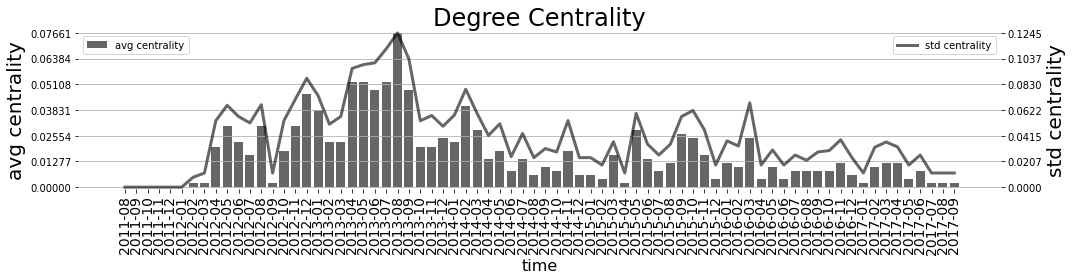

In [79]:
#plot degree centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,2] #degree centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Degree Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,2] #degree centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("degree_centrality_longtime.png",dpi=300)

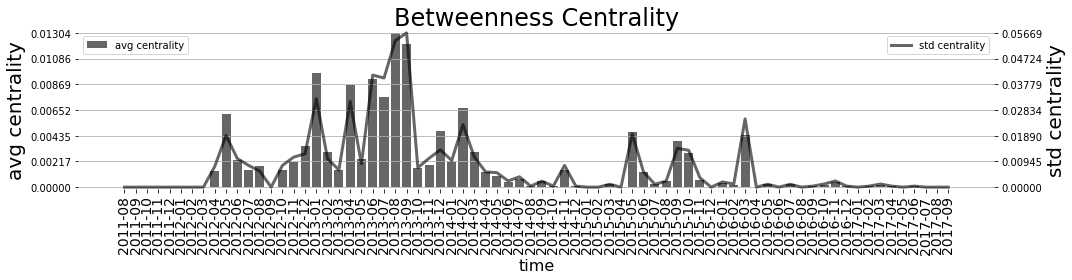

In [80]:
#plot betweenness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,3] #betweenness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Betweenness Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,3] #betweenness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("betweeness_centrality_long time.png",dpi=300)

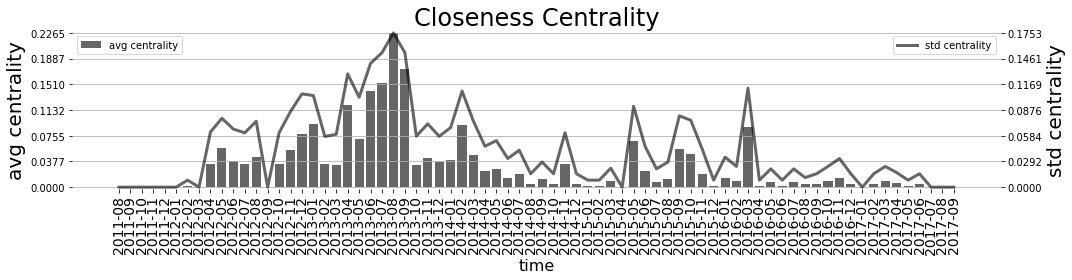

In [81]:
#plot closeness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,4] #closeness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title('Closeness Centrality', fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

x =whole_network_std_csv.iloc[:,4] #closeness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)

plt.tight_layout()
#plt.show()
plt.savefig("closeness_centrality_long_time.png",dpi=300)

## combine all the monthly centrality into one file

In [83]:
import glob

all_month=[]
for name in glob.glob('centrality_weighted/*.csv'):
    month=pd.read_csv(name)
    all_month.append(month)
    

In [84]:
pd_allmonth=pd.concat(all_month)
pd_allmonth

,Time,Name,degree_centrality,betweenness_centrality,closeness_centrality
0,2012-04,101 Restaurant,0.000000,0.0,0.000000
1,2012-04,Ausley McMullen,0.000000,0.0,0.000000
2,2012-04,Blueprint Intergovernmental Agency,0.064516,0.0,0.000000
3,2012-04,Broward County,0.000000,0.0,0.000000
4,2012-04,Capital City Bank,0.000000,0.0,0.000000
...,...,...,...,...,...
27,2017-04,U of Florida,0.000000,0.0,0.000000
28,2017-04,United Way of the Big Bend,0.000000,0.0,0.000000
29,2017-04,WCTV,0.000000,0.0,0.000000
30,2017-04,leon County,0.096774,0.0,0.043011


In [85]:

pd_allmonth = pd_allmonth.sort_values(by='Time')

In [87]:
#pd_allmonth.to_csv('all top organization centrality by month.csv',index=0)